In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/bacterial_leaf_blight/bacterial_val (38).JPG
/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/bacterial_leaf_blight/bacterial_val (4).JPG
/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/bacterial_leaf_blight/bacterial_val (11).JPG
/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/bacterial_leaf_blight/bacterial_val (57).JPG
/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/bacterial_leaf_blight/bacterial_val (10).jpg
/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/bacterial_leaf_blight/bacterial_val (34).JPG
/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/bacterial_leaf_blight/bacterial_val (84).jpg
/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/bacterial_leaf_blight/bacterial_val (52).JPG
/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/bacterial_leaf_bligh

In [45]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
train_dir = '/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/train'
validation_dir = '/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation'

In [5]:
def create_dataframe(directory):
    image_paths = []
    labels = []

    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    full_path = os.path.join(label_path, img_file)
                    image_paths.append(full_path)
                    labels.append(label)

    return pd.DataFrame({'image_path': image_paths, 'label': labels})



In [6]:
train_df = create_dataframe(train_dir)
val_df = create_dataframe(validation_dir)

In [8]:
val_df

,image_path,label
0,/kaggle/input/rice-leafs-disease-dataset/RiceL...,bacterial_leaf_blight
1,/kaggle/input/rice-leafs-disease-dataset/RiceL...,bacterial_leaf_blight
2,/kaggle/input/rice-leafs-disease-dataset/RiceL...,bacterial_leaf_blight
3,/kaggle/input/rice-leafs-disease-dataset/RiceL...,bacterial_leaf_blight
4,/kaggle/input/rice-leafs-disease-dataset/RiceL...,bacterial_leaf_blight
...,...,...
523,/kaggle/input/rice-leafs-disease-dataset/RiceL...,leaf_blast
524,/kaggle/input/rice-leafs-disease-dataset/RiceL...,leaf_blast
525,/kaggle/input/rice-leafs-disease-dataset/RiceL...,leaf_blast
526,/kaggle/input/rice-leafs-disease-dataset/RiceL...,leaf_blast


In [13]:
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    directory=train_dir,
                                                    x_col='image_path',
                                                    y_col='label',
                                                    batch_size=batch_size,
                                                    target_size=(256,256),
                                                    class_mode='categorical')

val_generator = test_datagen.flow_from_dataframe(val_df,
                                                    directory=validation_dir ,
                                                    x_col='image_path',
                                                    y_col='label',
                                                     batch_size=batch_size,
                                                    target_size=(256,256),
                                                  class_mode='categorical')

Found 2100 validated image filenames belonging to 6 classes.
Found 528 validated image filenames belonging to 6 classes.


In [25]:
# === Step 6: CNN Model Architecture ===
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,465,030 (13.22 MB)

 Trainable params: 3,465,030 (13.22 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=4,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)


checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,  
    verbose=1
)

In [28]:
model.save('my_model.h5')


In [29]:
history= model.fit( train_generator, validation_data=val_generator, epochs=50, callbacks=[callback,checkpoint] )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1754278682.218383     107 service.cc:148] XLA service 0x7e0dc8011190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754278682.219429     107 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1754278682.705880     107 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/66 ━━━━━━━━━━━━━━━━━━━━ 11:14 10s/step - accuracy: 0.0938 - loss: 1.8013

I0000 00:00:1754278688.432577     107 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 817ms/step - accuracy: 0.1463 - loss: 1.7987
Epoch 1: val_accuracy improved from -inf to 0.25568, saving model to best_model.h5
66/66 ━━━━━━━━━━━━━━━━━━━━ 73s 961ms/step - accuracy: 0.1466 - loss: 1.7987 - val_accuracy: 0.2557 - val_loss: 1.7386
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.2584 - loss: 1.7215
Epoch 2: val_accuracy improved from 0.25568 to 0.33523, saving model to best_model.h5
66/66 ━━━━━━━━━━━━━━━━━━━━ 49s 747ms/step - accuracy: 0.2589 - loss: 1.7203 - val_accuracy: 0.3352 - val_loss: 1.5032
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.3668 - loss: 1.5128
Epoch 3: val_accuracy improved from 0.33523 to 0.48864, saving model to best_model.h5
66/66 ━━━━━━━━━━━━━━━━━━━━ 49s 739ms/step - accuracy: 0.3670 - loss: 1.5121 - val_accuracy: 0.4886 - val_loss: 1.2322
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 677ms/step - accuracy: 0.3854 - loss: 1.3909
Epoch 4: val_accuracy did not improve from 0.48864
66/66 ━

In [50]:
loss, accuracy = model.evaluate(val_generator)  # or validation_generator
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 288ms/step - accuracy: 0.9363 - loss: 0.2178
Validation Accuracy: 92.42%


In [33]:
predictions = model.predict(val_generator, steps=len(val_generator))
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())


17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 301ms/step


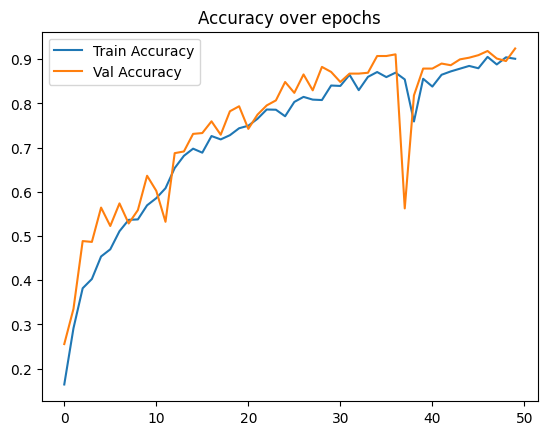

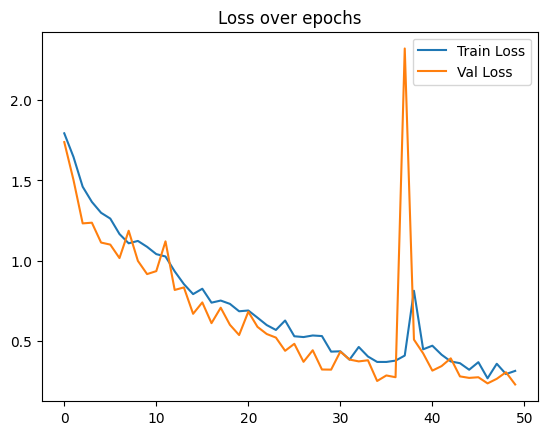

In [35]:
# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

In [46]:
results = []

for i in range(16):  # number of images to show
    img, label = val_generator[i]
    img_np = img[0]  # (1, h, w, c) → (h, w, c)

    true_index = np.argmax(label[0])
    pred_index = predicted_classes[i]

    results.append({
        'image': img_np,
        'true_label': true_index,
        'pred_label': pred_index
    })

In [47]:


def show_predictions(results, class_names, num_images=16):
    plt.figure(figsize=(16, 16))
    
    # Randomly sample results
    sampled_results = random.sample(results, min(num_images, len(results)))

    for i, result in enumerate(sampled_results):
        img = result['image']
        true = class_names[result['true_label']]
        pred = class_names[result['pred_label']]
        correct = (true == pred)

        plt.subplot(4, 4, i + 1)
        plt.imshow(img)
        plt.axis('off')
        title = f"True: {true}\nPred: {pred}"
        plt.title(title, color='green' if correct else 'red')

    plt.tight_layout()
    plt.show()

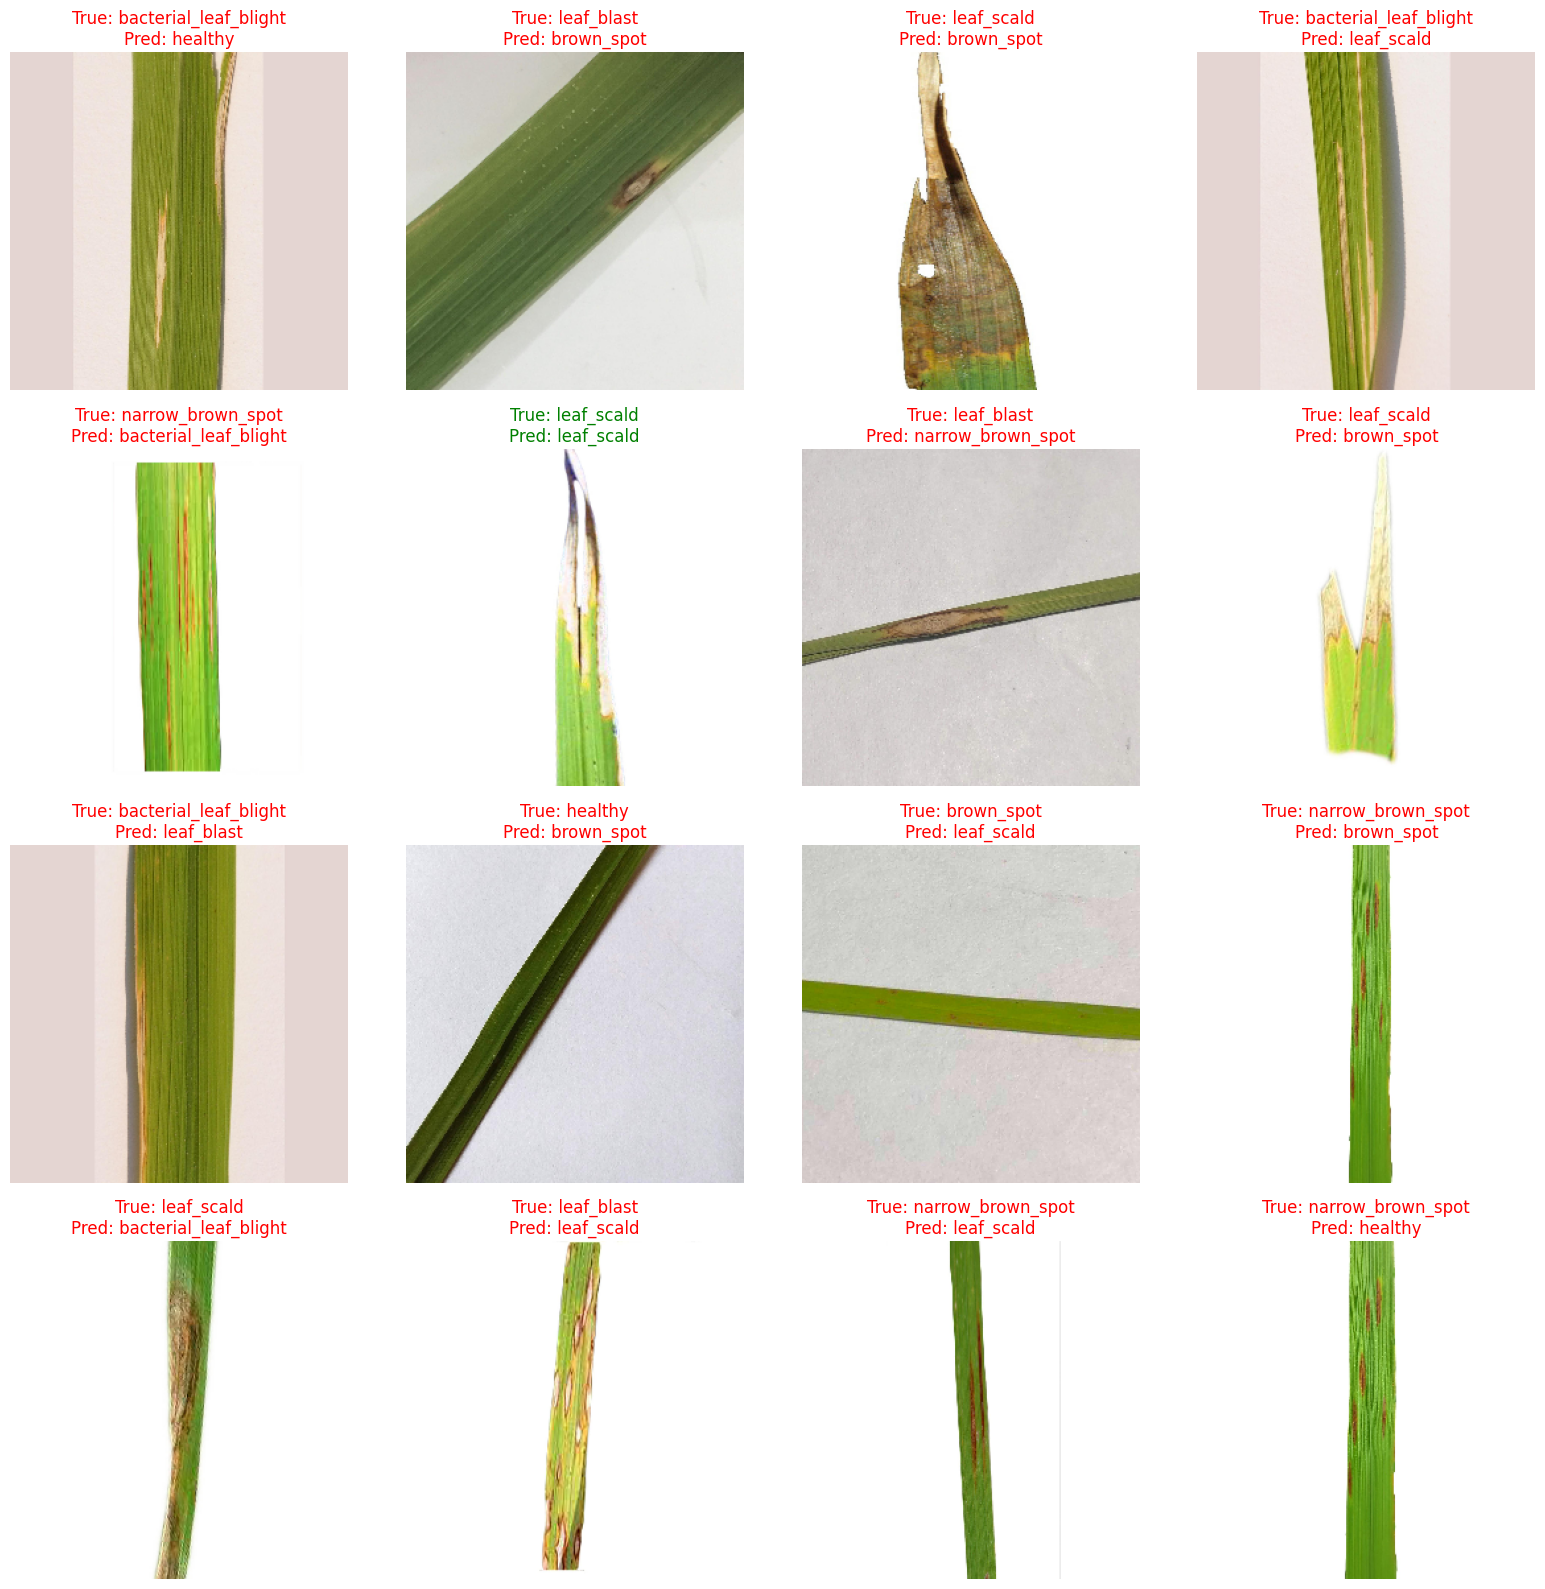

In [51]:
show_predictions(results, class_names=class_labels, num_images=16)
